In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pydotplus
from IPython.display import Image

In [2]:
# Import our input dataset
companies_df = pd.read_csv("All.csv")
companies_df.head()

sector                          Name symbol    code  year  \
0  Academic & Education  Global Education Communities    GEC  A&E 01  2013   
1  Academic & Education  Global Education Communities    GEC  A&E 01  2014   
2  Academic & Education  Global Education Communities    GEC  A&E 01  2015   
3  Academic & Education  Global Education Communities    GEC  A&E 01  2016   
4  Academic & Education  Global Education Communities    GEC  A&E 01  2017   

   Current ratio  Quick Ratio  Cash ratio  Operating cash flow ratio  \
0           0.63         0.61        0.20                      -0.10   
1           0.78         0.76        0.16                      -0.25   
2           0.27         0.26        0.05                       0.08   
3           0.76         0.73        0.27                      -0.04   
4           0.32         0.31        0.12                       0.18   

   Working capital ratio  ...  EV / EBIT  EV / Free Cash Flow  \
0                   0.63  ...      -6.2x                -4.0x   
1                   0.78  ...      -9.0x                -2.6x   
2                   0.27  ...     -22.7x                16.6x   
3                   0.76  ...      54.3x                84.6x   
4                   0.32  ...     162.1x                28.4x   

   EV / Invested Capital  EV / Revenue  P/E Ratio  Price/Book  \
0                   0.9x          0.9x      -5.9x        1.1x   
1                   0.7x          0.5x     -14.3x        1.0x   
2                   1.0x          1.9x     -18.7x        1.1x   
3                   1.1x          2.4x       6.4x        1.5x   
4                   1.2x          3.4x      30.6x        1.8x   

   Dividend Per Share  Altman Z-Score Piotroski Score Classification  
0                 0.0            -3.1               0              0  
1                 0.0            -0.9               6              0  
2                 0.0            -0.7               4              0  
3                 0.0             2.9               4              1  
4                 0.0             1.9               4              1  

[5 rows x 38 columns]

In [3]:
# Replacing x suffix from the DataFrame

columns_with_x = ['EV/EBITDA', 'EV / EBIT', 'EV / Free Cash Flow',
                    'EV / Invested Capital', 'EV / Revenue', 'P/E Ratio', 'Price/Book']

# Function to remove 'x' and convert to numeric
def remove_x_convert_numeric(value):
    if isinstance(value, str):
        return pd.to_numeric(value.replace('x', ''), errors='coerce')
    return value

# Apply the function to the specified columns
for column in columns_with_x:
    companies_df[column] = companies_df[column].apply(remove_x_convert_numeric)

In [4]:
print(companies_df.shape)
companies_df.head()

(1781, 38)


sector                          Name symbol    code  year  \
0  Academic & Education  Global Education Communities    GEC  A&E 01  2013   
1  Academic & Education  Global Education Communities    GEC  A&E 01  2014   
2  Academic & Education  Global Education Communities    GEC  A&E 01  2015   
3  Academic & Education  Global Education Communities    GEC  A&E 01  2016   
4  Academic & Education  Global Education Communities    GEC  A&E 01  2017   

   Current ratio  Quick Ratio  Cash ratio  Operating cash flow ratio  \
0           0.63         0.61        0.20                      -0.10   
1           0.78         0.76        0.16                      -0.25   
2           0.27         0.26        0.05                       0.08   
3           0.76         0.73        0.27                      -0.04   
4           0.32         0.31        0.12                       0.18   

   Working capital ratio  ...  EV / EBIT  EV / Free Cash Flow  \
0                   0.63  ...       -6.2                 -4.0   
1                   0.78  ...       -9.0                 -2.6   
2                   0.27  ...      -22.7                 16.6   
3                   0.76  ...       54.3                 84.6   
4                   0.32  ...      162.1                 28.4   

   EV / Invested Capital  EV / Revenue  P/E Ratio  Price/Book  \
0                    0.9           0.9       -5.9         1.1   
1                    0.7           0.5      -14.3         1.0   
2                    1.0           1.9      -18.7         1.1   
3                    1.1           2.4        6.4         1.5   
4                    1.2           3.4       30.6         1.8   

   Dividend Per Share  Altman Z-Score Piotroski Score Classification  
0                 0.0            -3.1               0              0  
1                 0.0            -0.9               6              0  
2                 0.0            -0.7               4              0  
3                 0.0             2.9               4              1  
4                 0.0             1.9               4              1  

[5 rows x 38 columns]

In [5]:
# Define the Columns to Convert to float
columns_to_convert = [
    'Interest coverage ratio',
    'The Long-Term Debt Coverage Ratio',
    'Total debt to EBITDA ratio',
    'Inventory turnover ratio',
    'Receivables turnover ratio',
    'Working capital turnover ratio',
    'EBITDA'
]

def convert_to_float(df, columns):
    for column in columns:
        # Remove commas and convert to float
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# Apply the conversion function to the DataFrame
convert_to_float(companies_df, columns_to_convert)


In [6]:
# Drop columns from the DataFrame
companies_df.drop(columns=['sector', 'symbol', 'code',
'Current ratio',
"Net profit margin",
'Operating cash flow ratio',
'Equity Ratio',
'Debt to equity ratio',
'The Long-Term Debt Coverage Ratio',
'Asset Turnover Ratio',
'EBITDA',
'EV / EBIT',
'EV / Free Cash Flow',
'EV / Revenue',
'P/E Ratio',
'Price/Book',
'Dividend Per Share',
'EV/EBITDA',
'EV / Invested Capital',
'Classification'], inplace=True)

In [7]:
companies_df.columns

Index(['Name', 'year', 'Quick Ratio', 'Cash ratio', 'Working capital ratio',
       'Return On Equity (ROE)', 'Sales turnover ratio',
       'Return On Assets (ROA)', 'EPS', 'Debt-to-assets ratio',
       'Interest coverage ratio', 'Total debt to EBITDA ratio',
       'Cash flow to debt ratio', 'Inventory turnover ratio',
       'Receivables turnover ratio', 'Working capital turnover ratio',
       'Altman Z-Score', 'Piotroski Score'],
      dtype='object')

In [8]:
companies_df.isna().sum()

Name                              0
year                              0
Quick Ratio                       0
Cash ratio                        0
Working capital ratio             0
Return On Equity (ROE)            0
Sales turnover ratio              0
Return On Assets (ROA)            0
EPS                               0
Debt-to-assets ratio              0
Interest coverage ratio           0
Total debt to EBITDA ratio        0
Cash flow to debt ratio           0
Inventory turnover ratio          0
Receivables turnover ratio        0
Working capital turnover ratio    0
Altman Z-Score                    0
Piotroski Score                   0
dtype: int64

In [9]:
companies_df.dropna(axis='index', inplace=True)
print(companies_df.shape)
companies_df.head()

(1781, 18)


Name  year  Quick Ratio  Cash ratio  \
0  Global Education Communities  2013         0.61        0.20   
1  Global Education Communities  2014         0.76        0.16   
2  Global Education Communities  2015         0.26        0.05   
3  Global Education Communities  2016         0.73        0.27   
4  Global Education Communities  2017         0.31        0.12   

   Working capital ratio  Return On Equity (ROE)  Sales turnover ratio  \
0                   0.63                 -0.1244                0.7228   
1                   0.78                  0.2191                0.7415   
2                   0.27                  0.0288                0.3989   
3                   0.76                  0.0711                0.3529   
4                   0.32                  0.0310                0.3209   

   Return On Assets (ROA)    EPS  Debt-to-assets ratio  \
0                 -0.0373 -0.032                0.6541   
1                  0.1274 -0.028                0.4352   
2                  0.0744  0.016                0.5522   
3                  0.0900  0.057                0.4632   
4                  0.0496  0.033                0.5388   

   Interest coverage ratio  Total debt to EBITDA ratio  \
0                    44.83                      -18.46   
1                  -131.62                      -15.33   
2                   -71.82                       64.40   
3                   -79.23                      -89.90   
4                  -111.70                       19.86   

   Cash flow to debt ratio  Inventory turnover ratio  \
0                    -0.06                     33.57   
1                    -0.24                     31.24   
2                     0.07                     27.31   
3                    -0.01                     46.20   
4                     0.12                     41.31   

   Receivables turnover ratio  Working capital turnover ratio  Altman Z-Score  \
0                        4.63                           -4.52            -3.1   
1                        4.22                           -8.18            -0.9   
2                        4.03                           -1.02            -0.7   
3                        5.31                           -9.04             2.9   
4                        5.78                           -1.32             1.9   

   Piotroski Score  
0                0  
1                6  
2                4  
3                4  
4                4

In [10]:
# Define features (X) and target (y)
X = companies_df.drop("Altman Z-Score", axis=1)  # Assuming "Altman Z-Score" is the target column
y = companies_df["Altman Z-Score"]

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Concatenate the training and test sets
combined_data = pd.concat([X_train, X_test])

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
combined_data_encoded = pd.get_dummies(combined_data)

# Split the combined dataset back into training and test sets
X_train_encoded = combined_data_encoded[:len(X_train)]
X_test_encoded = combined_data_encoded[len(X_train):]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [13]:
# Create the decision tree regressor instance
model = tree.DecisionTreeRegressor()

In [14]:
# Fit the model
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)


In [15]:
# Create the decision tree regressor instance
model = tree.DecisionTreeRegressor()

# Fit the model
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.38037 to fit



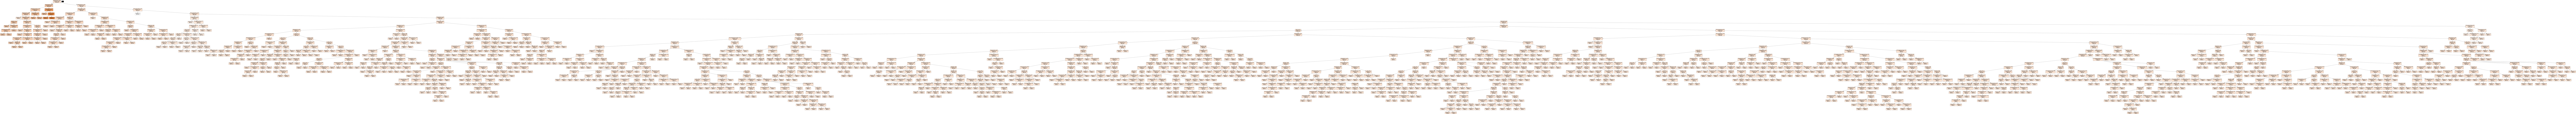

In [16]:

# Visualize the decision tree
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X_train_encoded.columns, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [17]:
# Save the decision tree visualization as PNG
graph.write_png("decision_tree.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.38037 to fit



True

In [19]:
# Importing the pickle module for object serialization
import pickle

with open('logreg.pkl', 'wb') as f:
    pickle.dump(model, f)